<a href="https://colab.research.google.com/github/Advaiti/bert/blob/master/NLP_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
!pip install wordninja
import wordninja

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df = pd.read_csv('/content/Train_Data.csv')

In [5]:
df.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [6]:
new_heading = []
for i in df['headline']:
  i = re.sub("[^a-zA-Z']", ' ',i)
  i = re.sub("[']", '',i).replace('  ',' ')
  sent = i.lower().split()
  new_sent = []
  for i in sent:
    for i in wordninja.split(i):
      new_sent.append(i)
  for j in range(len(new_sent)):
    new_sent[j] = lemmatizer.lemmatize(new_sent[j])
  i = ' '.join(new_sent)
  new_heading.append(i)
df['new_heading'] = new_heading

In [7]:
df.head()

,headline,is_sarcastic,new_heading
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote to legalize all worldly vice
1,hungover man horrified to learn he made dozens...,1,hungover man horrified to learn he made dozen ...
2,emily's list founder: women are the 'problem s...,0,emily s list founder woman are the problem sol...
3,send your kids back to school with confidence,0,send your kid back to school with confidence
4,watch: experts talk pesticides and health,0,watch expert talk pesticide and health


In [8]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [10]:
X = df['new_heading']
Y = df['is_sarcastic']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [12]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
predictions = pipeline.predict(X_test)

Accuracy Score : 0.8652759996987724
Report : 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7201
           1       0.91      0.79      0.84      6078

    accuracy                           0.87     13279
   macro avg       0.87      0.86      0.86     13279
weighted avg       0.87      0.87      0.86     13279



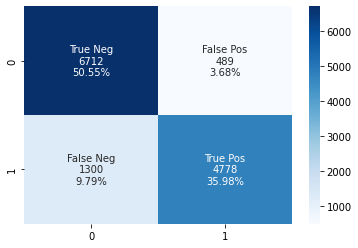

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
group_names = ['True Neg','False Pos','False Neg','True Pos']
results = confusion_matrix(y_test, predictions) 
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Blues')
print('Accuracy Score :',accuracy_score(y_test, predictions))
print('Report : ')
print(classification_report(y_test, predictions))

In [15]:
tdf = pd.read_csv('/content/Test_Data.csv')

In [16]:
tdf = tdf["headline"]

In [17]:
prediction = pipeline.predict(tdf)

In [18]:
res = pd.DataFrame(prediction) 
res.columns = ["prediction"]
from google.colab import files
res.to_csv('prediction_results.csv', index = False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>